## Exploratory Data Analysis (EDA) on spotify top listed songs from 2010 to 2019

**Saiful Hasan [LinkedIn](https://www.linkedin.com/in/saifulhasan22/) [Website](https://saifulhasanchayan.wixsite.com/portfolio)** 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

#### Data Import and Cleaning

In [2]:
#reading data
spotify = pd.read_csv('./spotify.csv', encoding="latin-1")

In [3]:
#first 5 rows of the dataframe
spotify.head()

,Unnamed: 0,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


In [4]:
#removing unnecessary column
spotify.drop('Unnamed: 0', axis = 1, inplace = True)

In [5]:
#renaming the column names
spotify.rename(columns = {'pop': 'popularity', 'bpm':'beats_per_min', 'nrgy':'energy', \
                                  'live': 'liveliness', 'dnce': 'danceability', 'dB': 'loundness', 'val': 'valence ', \
                                   'dur': 'duration', 'acous': 'acousticness', 'spch':'speechiness'}, inplace = True)

In [6]:
#now checking the dataframe with new column names
spotify.head()

,title,artist,top genre,year,beats_per_min,energy,danceability,loundness,liveliness,valence,duration,acousticness,speechiness,popularity
0,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


In [7]:
#checking null values
spotify.isnull().sum().sum()

0

In [8]:
#checking data types and other info
spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 603 entries, 0 to 602
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   title          603 non-null    object
 1   artist         603 non-null    object
 2   top genre      603 non-null    object
 3   year           603 non-null    int64 
 4   beats_per_min  603 non-null    int64 
 5   energy         603 non-null    int64 
 6   danceability   603 non-null    int64 
 7   loundness      603 non-null    int64 
 8   liveliness     603 non-null    int64 
 9   valence        603 non-null    int64 
 10  duration       603 non-null    int64 
 11  acousticness   603 non-null    int64 
 12  speechiness    603 non-null    int64 
 13  popularity     603 non-null    int64 
dtypes: int64(11), object(3)
memory usage: 66.1+ KB


#### Data Dictionary

|__Feature__|__Description__|
|:---|:---|
|`title`|__The title of the songs.__|
|`top genre`|__The genre of the songs.__|
|`artist`|__The artist (name) of the songs.__|
|`year`|__Song's year in the Billboard.__|
|`beats_per_min`|__Beats per minute - this measures the tempo of the song.__|
|`energy`|__It represents a perceptual measure of intensity and activity. The energy of a song - the higher the value, the more energtic the song. Typically, energetic songs feel fast, loud, and noisy. For instance, death metal has high energy, while a Bach prelude scores low on the scale.__|
|`danceability`|__It is a measure using a mixture of song features such as beat strength, tempo stability, and overall tempo. The higher the value, the easier it is to dance to the song.__|
|`loudness`|__It represents the overall loudness of a track in decibels (dB). The loudness values are averaged across the entire song. The higher the value, the louder the song.__|
|`liveness`|__The higher the value, the more likely the song is a live recording.__|
|`valence`|__The higher the value, the more positive mood for the song (e.g. happy, cheerful, euphoric) and the lower the value the more negative (or less positive) mood for the song ( e.g. sad, depression, angry). It refers the musical positiveness conveyed by a song.__|
|`duration`|__The length or duration of the song.__|
|`acousticness`|__A confidence measure from 0.0 to 1.0 of whether the song is acoustic. The higher the value, the more acoustic the song__|
|`speechiness`|__This is a measure to detect the presence of spoken words in a song. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Thus, the higher the value the more spoken word the song contains.__|
|`popularity`|__The higher the value, the more popular the song__|


Reference : [Ashrith](https://towardsdatascience.com/what-makes-a-song-likeable-dbfdb7abe404), [Kaggle](https://www.kaggle.com/leonardopena/top-spotify-songs-from-20102019-by-year)

#### Exploratory Data Analysis (EDA)

In [9]:
#brief description of the data
spotify.describe().T

,count,mean,std,min,25%,50%,75%,max
year,603.0,2014.592040,2.607057,2010.0,2013.0,2015.0,2017.0,2019.0
beats_per_min,603.0,118.545605,24.795358,0.0,100.0,120.0,129.0,206.0
energy,603.0,70.504146,16.310664,0.0,61.0,74.0,82.0,98.0
danceability,603.0,64.379768,13.378718,0.0,57.0,66.0,73.0,97.0
loundness,603.0,-5.578773,2.798020,-60.0,-6.0,-5.0,-4.0,-2.0
liveliness,603.0,17.774461,13.102543,0.0,9.0,12.0,24.0,74.0
valence,603.0,52.225539,22.513020,0.0,35.0,52.0,69.0,98.0
duration,603.0,224.674959,34.130059,134.0,202.0,221.0,239.5,424.0
acousticness,603.0,14.326700,20.766165,0.0,2.0,6.0,17.0,99.0
speechiness,603.0,8.358209,7.483162,0.0,4.0,5.0,9.0,48.0


In [10]:
beats_per_min = spotify[['artist','title', 'beats_per_min']].sort_values(by='beats_per_min', ascending = False)[:1]
print('Highest beats per minutes song title:{} and artist {}'.format(list(beats_per_min['artist']), \
                                                                     list(beats_per_min['title']))) 
energy = spotify[['artist','title', 'energy']].sort_values(by='energy', ascending = False)[:1]
print('Highest energy song title:{} and artist {}'.format(list(energy['artist']), \
                                                                     list(energy['title']))) 
liveliness = spotify[['artist','title', 'liveliness']].sort_values(by='liveliness', ascending = False)[:1]
print('Highest liveliness song title:{} and artist {}'.format(list(liveliness['artist']), \
                                                                     list(liveliness['title']))) 
acousticness = spotify[['artist','title', 'acousticness']].sort_values(by='acousticness', ascending = False)[:1]
print('Highest acousticness song title:{} and artist {}'.format(list(acousticness['artist']), \
                                                                     list(acousticness['title']))) 
danceability = spotify[['artist','title', 'danceability']].sort_values(by='danceability', ascending = False)[:1]
print('Highest danceability song title:{} and artist {}'.format(list(danceability['artist']), \
                                                                     list(danceability['title']))) 


Highest beats per minutes song title:['Rihanna'] and artist ['FourFiveSeconds']
Highest energy song title:['Jonas Brothers'] and artist ['Pom Poms']
Highest liveliness song title:['Meghan Trainor'] and artist ['NO']
Highest acousticness song title:['John Legend'] and artist ['Start']
Highest danceability song title:['Cardi B'] and artist ['Drip (feat. Migos)']


In [44]:
beats_per_min = spotify[['artist','title', 'beats_per_min']].sort_values(by='beats_per_min', ascending = False)[-1:]
print('Lowest beats per minutes song title:{} and artist {}'.format(list(beats_per_min['artist']), \
                                                                     list(beats_per_min['title']))) 
energy = spotify[['artist','title', 'energy']].sort_values(by='energy', ascending = False)[-1:]
print('Lowest energy song title:{} and artist {}'.format(list(energy['artist']), \
                                                                     list(energy['title']))) 
liveliness = spotify[['artist','title', 'liveliness']].sort_values(by='liveliness', ascending = False)[-1:]
print('Lowest liveliness song title:{} and artist {}'.format(list(liveliness['artist']), \
                                                                     list(liveliness['title']))) 
acousticness = spotify[['artist','title', 'acousticness']].sort_values(by='acousticness', ascending = False)[-1:]
print('Lowest acousticness song title:{} and artist {}'.format(list(acousticness['artist']), \
                                                                     list(acousticness['title']))) 
danceability = spotify[['artist','title', 'danceability']].sort_values(by='danceability', ascending = False)[-1:]
print('Lowest danceability song title:{} and artist {}'.format(list(danceability['artist']), \
                                                                     list(danceability['title'])))

Lowest beats per minutes song title:['Adele'] and artist ['Million Years Ago']
Lowest energy song title:['Adele'] and artist ['Million Years Ago']
Lowest liveliness song title:['Adele'] and artist ['Million Years Ago']
Lowest acousticness song title:['Katy Perry'] and artist ['Last Friday Night (T.G.I.F.)']
Lowest danceability song title:['Adele'] and artist ['Million Years Ago']


In [11]:
print('Total number of years in our datset:', len(spotify.year.unique()))
print('We have top song lists from years:', list(spotify.year.unique()))

Total number of years in our datset: 10
We have top song lists from years: [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]


In [12]:
print('Average popularity by year (in descending order by popularity)')
print('--'*31)
spotify.groupby('year')[['popularity']].mean().sort_values(by = 'popularity', ascending = False)

Average popularity by year (in descending order by popularity)
--------------------------------------------------------------


,popularity
year,
2019,84.354839
2018,72.437500
2017,69.015385
2012,67.771429
2015,64.568421
2010,64.254902
2016,64.162500
2013,63.985915
2014,62.706897


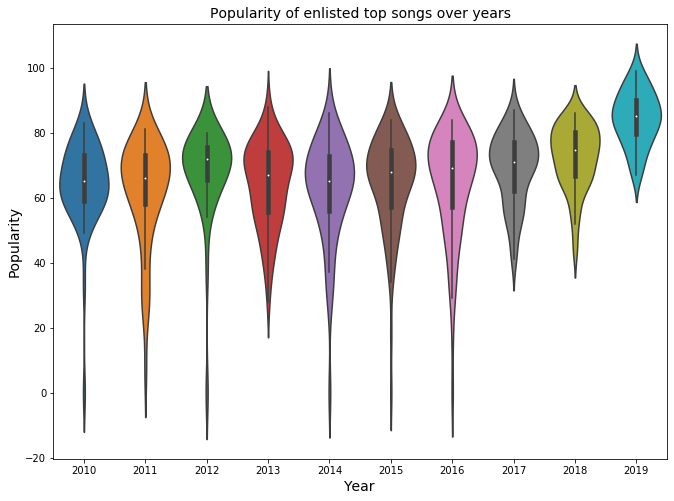

In [13]:
#sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)
ax = sns.violinplot(data=spotify, x='year', y='popularity', scale="width")
ax.set_title('Popularity of enlisted top songs over years', fontsize = 14)
ax.set_xlabel('Year', fontsize = 14)
ax.set_ylabel('Popularity', fontsize = 14);

**For most of the years, the average popularity scores were between 60-70, while in 2019, it has the highest popularity score of around 85.**

In [14]:
print('Total number of artists who made on the top song list of Spotify in the period 2010-2109:', \
      spotify['artist'].nunique())

Total number of artists who made on the top song list of Spotify in the period 2010-2109: 184


In [15]:
spotify['artist'].value_counts()[:13]

Katy Perry          17
Justin Bieber       16
Maroon 5            15
Rihanna             15
Lady Gaga           14
Bruno Mars          13
Shawn Mendes        11
Ed Sheeran          11
The Chainsmokers    11
Pitbull             11
Jennifer Lopez      10
Adele               10
Calvin Harris       10
Name: artist, dtype: int64

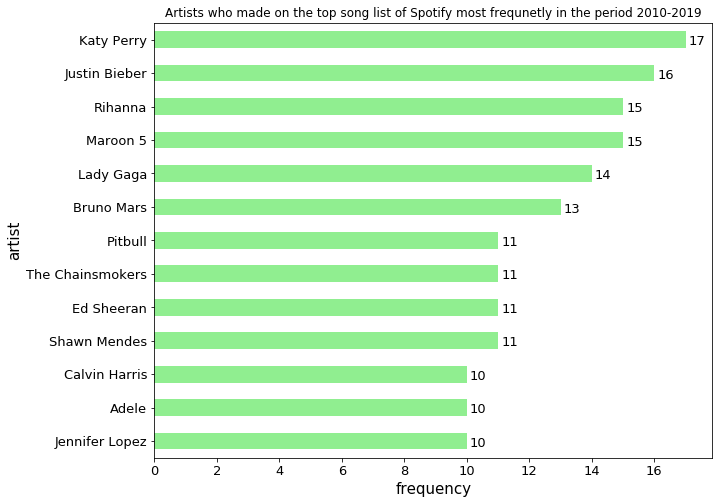

In [16]:
ax = spotify['artist'].value_counts()[:13].sort_values(ascending = True).plot(kind = 'barh', fontsize = 13, \
                                                                             figsize = (10,8), color = 'lightgreen')

# Code adopted and modified from http://robertmitchellv.com/blog-bar-chart-annotations-pandas-mpl.html
totals = []    ## create a list to collect the plt.patches data

# find the values and append to list
for p in ax.patches:
    totals.append(p.get_width())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for p in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(p.get_width()+.10, p.get_y()+.09, \
        int(p.get_width()), fontsize=13)
    
plt.xlabel('frequency', fontsize = 15)
plt.ylabel('artist', fontsize = 15)
plt.title('Artists who made on the top song list of Spotify most frequnetly in the period 2010-2019')
plt.show()

**Katy Perry** has most number of top songs on Spotify in the period of 2010-19 followed by **Justin Bieber**. **Rihanna** and **Maroon 5** both appreaded 15 times on the top song lists of Spotify between 2010-2019. 

In [17]:
katy_perry_data = spotify[spotify['artist'] == 'Katy Perry']
justin_beiber_data = spotify[spotify['artist'] == 'Justin Bieber']

In [18]:
print('The songs of Kety perry made to the top song list on Spotify during 2010-2019')
print('--'*40)
list(katy_perry_data['title'])

The songs of Kety perry made to the top song list on Spotify during 2010-2019
--------------------------------------------------------------------------------


['Teenage Dream',
 'California Gurls',
 'E.T.',
 'Last Friday Night (T.G.I.F.)',
 'Firework',
 'Part Of Me',
 'Wide Awake',
 'The One That Got Away',
 'Roar',
 'Dark Horse',
 'This Is How We Do',
 'Birthday',
 'Legendary Lovers',
 'Rise',
 'Swish Swish',
 'Chained To The Rhythm',
 'Bon appétit']

In [19]:
katy_perry_data = pd.DataFrame(spotify[spotify['artist'] == 'Katy Perry'])
print('Detail of top listed songs of Katy Perry')
print('--'*30)
print('average danceability:', np.round(katy_perry_data['danceability'].mean(), 2))
print('average liveliness:',np.round(katy_perry_data['liveliness'].mean(), 2))
print('average energy:', np.round(katy_perry_data['energy'].mean(), 2))
print('average beats_per_min:',np.round(katy_perry_data['beats_per_min'].mean(), 2))
print('average duration:',np.round(katy_perry_data['duration'].mean(), 2))
print('average acusticness:',np.round(katy_perry_data['acousticness'].mean(), 2))
print('average popularity:',np.round(katy_perry_data['popularity'].mean(), 2))
print('average speechiness:',np.round(katy_perry_data['speechiness'].mean(), 2))

Detail of top listed songs of Katy Perry
------------------------------------------------------------
average danceability: 65.71
average liveliness: 21.0
average energy: 75.94
average beats_per_min: 132.24
average duration: 224.18
average acusticness: 3.88
average popularity: 62.12
average speechiness: 6.41


In [20]:
print('The songs of Justin Bieber made on the top song list on Spotify during 2010-2019')
print('--'*40)
list(justin_beiber_data['title'])

The songs of Justin Bieber made on the top song list on Spotify during 2010-2019
--------------------------------------------------------------------------------


['Baby',
 'Beauty And A Beat',
 'Boyfriend',
 'Heartbreaker',
 'Love Yourself',
 'Sorry',
 'What Do You Mean?',
 'Company',
 "I'll Show You",
 'The Feeling',
 'What Do You Mean? - Acoustic',
 'Mark My Words',
 'Been You',
 'Love Yourself',
 'Company',
 'Friends (with BloodPop®)']

In [21]:
spotify[['artist','title','popularity']].sort_values(by='popularity', ascending = False)[:10]

,artist,title,popularity
572,Maroon 5,Memories,99
573,Selena Gomez,Lose You To Love Me,97
574,Lewis Capaldi,Someone You Loved,96
575,Shawn Mendes,Señorita,95
576,Sam Smith,How Do You Sleep?,93
578,SHAED,Trampoline (with ZAYN),92
577,Ed Sheeran,South of the Border (feat. Camila Cabello & Ca...,92
580,Lizzo,Truth Hurts,90
581,Lizzo,Good as Hell (feat. Ariana Grande) - Remix,90
579,Marshmello,Happier,90


In last 10 years, **Memories** by **Marron 5** got the highest popularity score **(99)** followed by **Lose You To Love Me** by **Selena Gomez**.

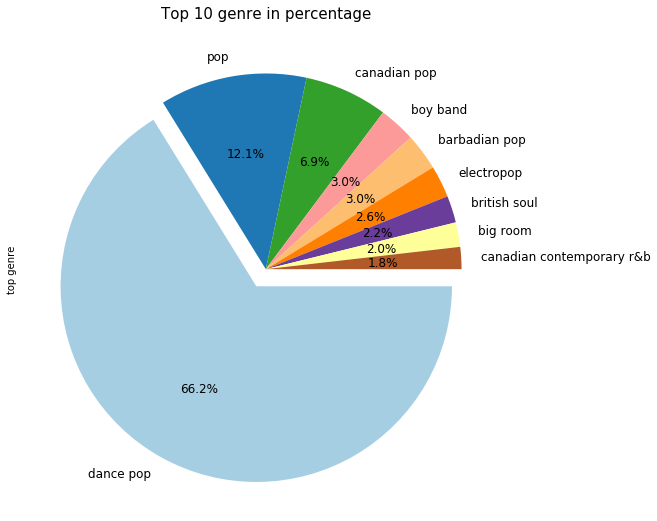

In [22]:
explode = (0.1, 0, 0, 0,0,0,0,0,0)
spotify['top genre'].value_counts()[:9].plot.pie(figsize=(9,9),fontsize = 12, explode=explode, autopct='%1.1f%%', \
                                                       counterclock = False, \
                                                       cmap = plt.get_cmap("Paired"))
plt.title('Top 10 genre in percentage', fontsize = 15);

We noticed that in last 10 years majority of the top listed songs were **dance pop**. It posses about **66% of all listed songs**. 

In [23]:
dance_pop_data = spotify[spotify['top genre'] == 'dance pop']

In [38]:
print('The average danceability of dance pop songs is :', dance_pop_data['danceability'].mean())

The average danceability of dance pop songs is : 65.97247706422019


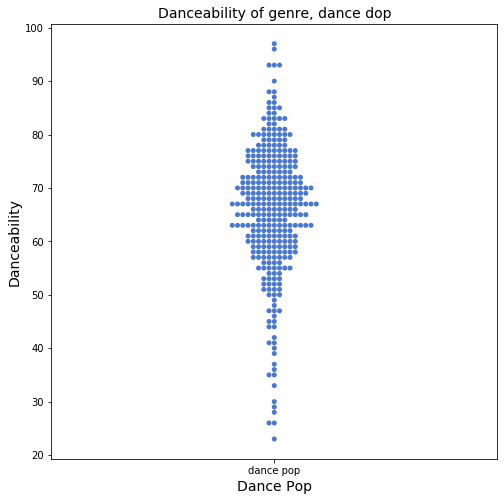

In [24]:
#seaborn swarmplot
fig, ax = plt.subplots()
fig.set_size_inches(8, 8)
ax = sns.swarmplot(data=dance_pop_data, x='top genre', y='danceability', palette="muted")
ax.set_title('Danceability of genre, dance dop', fontsize = 14)
ax.set_xlabel('Dance Pop', fontsize = 14)
ax.set_ylabel('Danceability', fontsize = 14);

We see that the danceability of the dance pop songs is **usually between 60 to 80 with an average of around 65 which is relatable.**

In [39]:
print('The average energy level of dance pop songs is :', dance_pop_data['energy'].mean())

The average energy level of dance pop songs is : 72.8256880733945


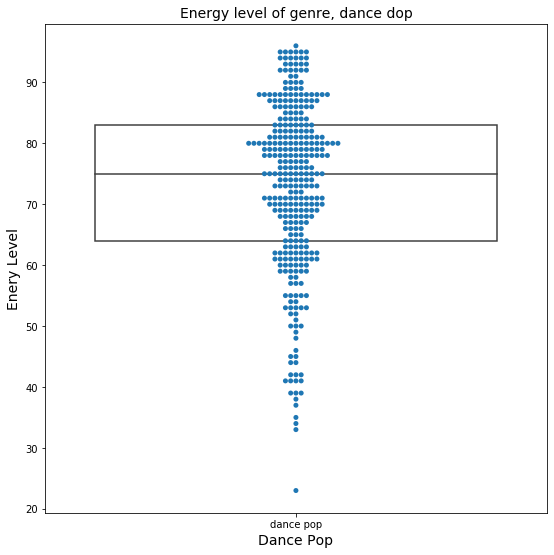

In [26]:
#seaborn swarmplot and boxplot together

fig, ax = plt.subplots()
fig.set_size_inches(9, 9)
ax = sns.swarmplot(data=dance_pop_data, x='top genre', y='energy')

# code adopted and modified from https://stackoverflow.com/questions/36153410/how-to-create-swarm-plot-with-matplotlib
ax = sns.boxplot(data=dance_pop_data, x='top genre', y='energy',
        showcaps=False,boxprops={'facecolor':'None'},
        showfliers=False,whiskerprops={'linewidth':0})
ax.set_title('Energy level of genre, dance dop', fontsize = 14)
ax.set_xlabel('Dance Pop', fontsize = 14)
ax.set_ylabel('Enery Level', fontsize = 14);

We see that the energy level of dance pop song is usually **between around 65 and 80, with an average of 73.**

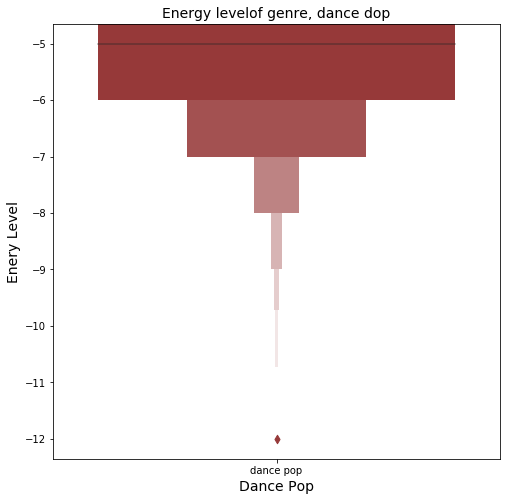

In [27]:
#seaborn boxenplot

fig, ax = plt.subplots()
fig.set_size_inches(8, 8)
ax = sns.boxenplot(data=dance_pop_data, x='top genre', y='loundness', color = 'brown')
ax.set_title('Energy levelof genre, dance dop', fontsize = 14)
ax.set_xlabel('Dance Pop', fontsize = 14)
ax.set_ylabel('Enery Level', fontsize = 14);

We see that majority of dance pop songs have **loudness below -7.**

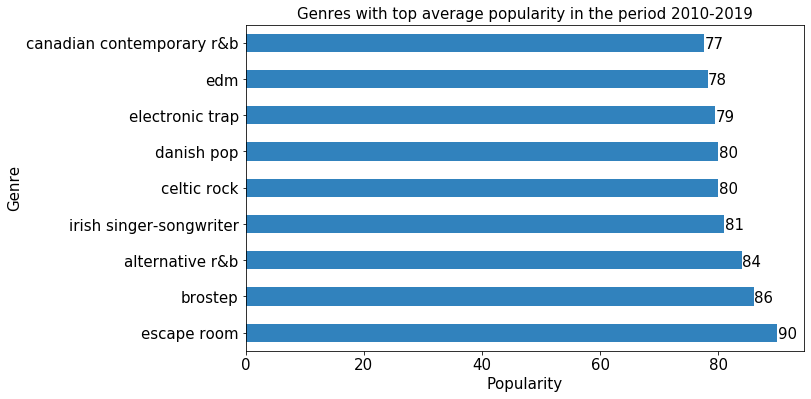

In [28]:
ax = spotify.groupby('top genre').mean()['popularity'].sort_values(ascending = False)[:9].plot(kind = 'barh', \
                                                                             fontsize = 15, \
                                                                             figsize = (10,6), \
                                                                            cmap = plt.get_cmap("tab20c"))

# Code adopted and modified from http://robertmitchellv.com/blog-bar-chart-annotations-pandas-mpl.html
totals = []    ## create a list to collect the plt.patches data

# find the values and append to list
for p in ax.patches:
    totals.append(p.get_width())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for p in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(p.get_width()+.10, p.get_y()+.09, \
        int(p.get_width()), fontsize=15)
    
plt.xlabel('Popularity', fontsize = 15)
plt.ylabel('Genre', fontsize = 15)
plt.title('Genres with top average popularity in the period 2010-2019', fontsize = 15)
plt.show()

**Escape room** genre has the highest average popularity followed by **brostep**. However, the reason these have higher average popularity score is there are very few songs of these genre, such as escpae room, brosteps, alternative r&b. **Appreanetly only 2 songs of escape room genre made to the top list over last 10 years and only one song for alternative r&b genre.**   

In [29]:
print('total number of escape room songs in the top list:',len(spotify[spotify['top genre'] == 'escape room']))
print('total number of brostep songs in the top list:',len(spotify[spotify['top genre'] == 'brostep']))
print('total number of alternative r&b songs in the top list:',len(spotify[spotify['top genre'] == 'alternative r&b']))

total number of escape room songs in the top list: 2
total number of brostep songs in the top list: 2
total number of alternative r&b songs in the top list: 1


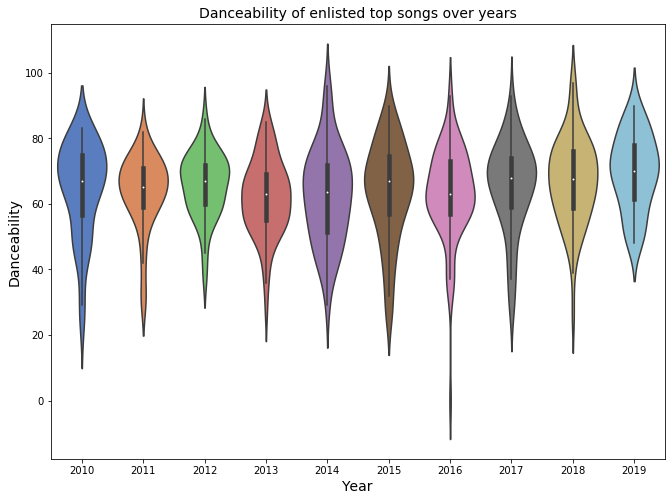

In [30]:
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)
ax = sns.violinplot(data=spotify, x='year', y='danceability', scale="width", palette="muted")
ax.set_title('Danceability of enlisted top songs over years', fontsize = 14)
ax.set_xlabel('Year', fontsize = 14)
ax.set_ylabel('Danceability', fontsize = 14);

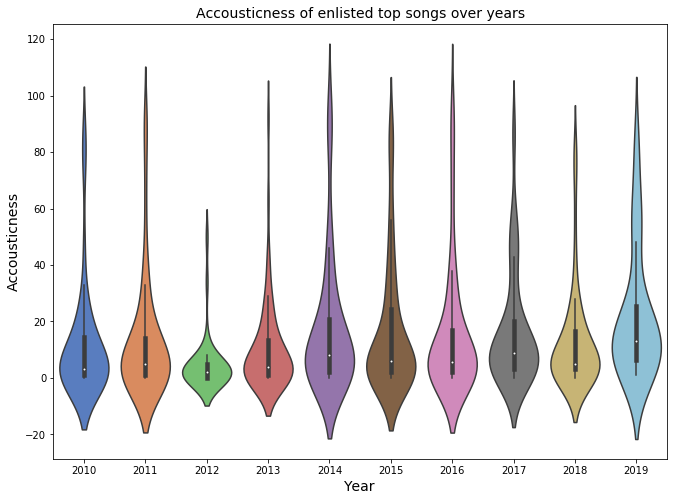

In [31]:
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)
ax = sns.violinplot(data=spotify, x='year', y='acousticness', scale="width", palette="muted")
ax.set_title('Accousticness of enlisted top songs over years', fontsize = 14)
ax.set_xlabel('Year', fontsize = 14)
ax.set_ylabel('Accousticness', fontsize = 14);

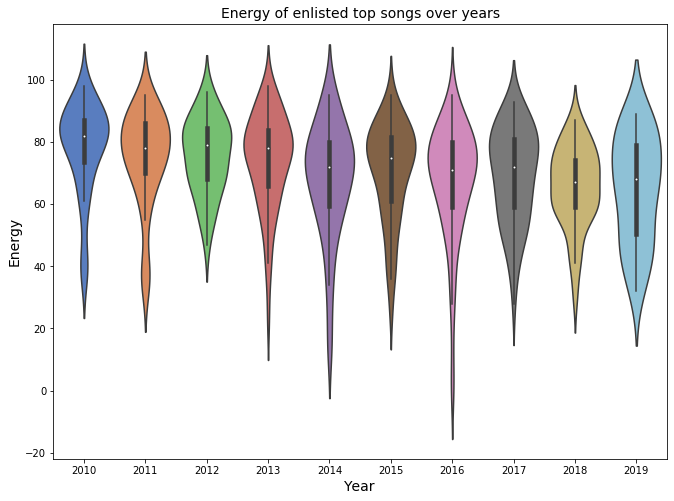

In [32]:
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)
ax = sns.violinplot(data=spotify, x='year', y='energy', scale="width", palette="muted")
ax.set_title('Energy of enlisted top songs over years', fontsize = 14)
ax.set_xlabel('Year', fontsize = 14)
ax.set_ylabel('Energy', fontsize = 14);

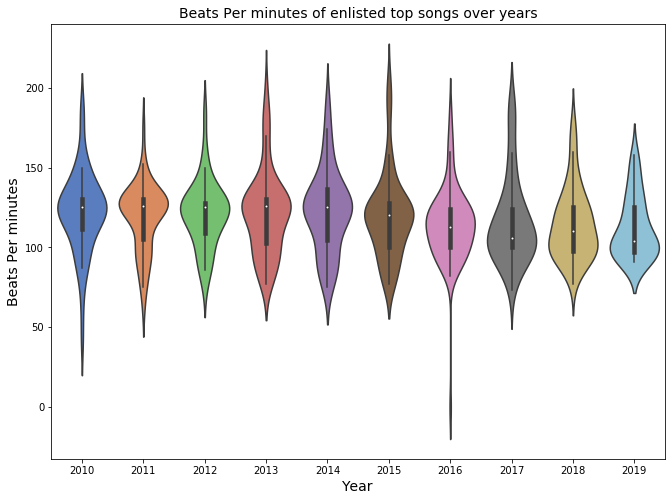

In [33]:
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)
ax = sns.violinplot(data=spotify, x='year', y='beats_per_min', scale="width", palette="muted")
ax.set_title('Beats Per minutes of enlisted top songs over years', fontsize = 14)
ax.set_xlabel('Year', fontsize = 14)
ax.set_ylabel('Beats Per minutes', fontsize = 14);

In [34]:
correlation = spotify.corr()[['popularity']].sort_values('popularity', ascending=False)

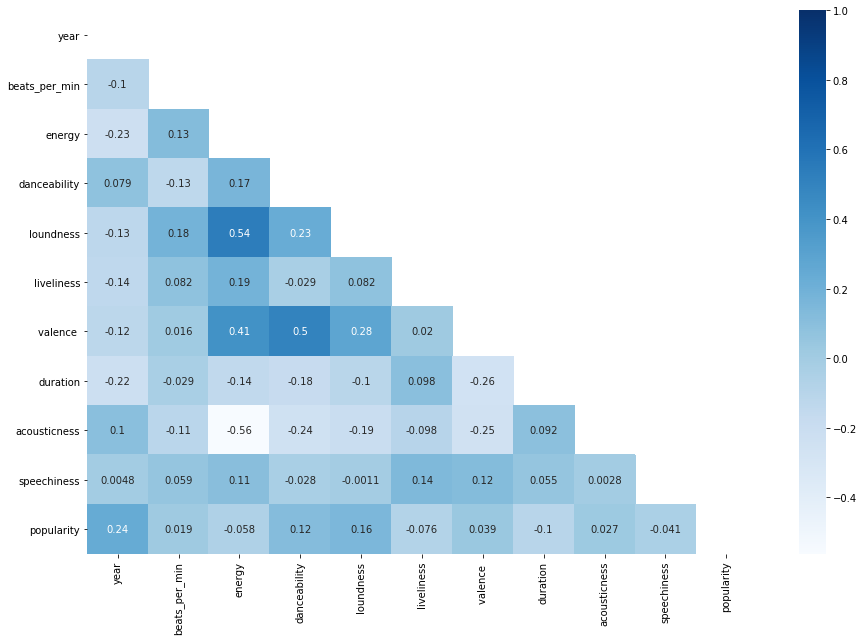

In [35]:
#adopted code from Mahdi Shadkam-Farrokhi

correlation = spotify.corr()
mask = np.triu(np.ones_like(correlation))
plt.subplots(figsize=(15,10))
sns.heatmap(correlation, annot=True, cmap ="Blues", mask = mask )

The correlation chart suggests that there is a very weak correlation between popularity and other features. So it is recommended that different features might be playing a role to determine the popularity score. There is a moderate strength correlation between loudness and energy, as well as valence and energy, which makes sense. There is also a moderate strength correlation between valence and danceability, which also makes sense.  

### Data Reference:

This data was collected from kaggle. The link is given below:
- https://www.kaggle.com/leonardopena/top-spotify-songs-from-20102019-by-year
- the data was uploaded by Leonardo Henrique on Kaggle 

### Other Reference:

- [1](https://stackoverflow.com/questions/11346283/renaming-columns-in-pandas), [2](https://stackoverflow.com/questions/13411544/delete-column-from-pandas-dataframe), [3](https://stackoverflow.com/questions/25447700/annotate-bars-with-values-on-pandas-bar-plots), [4](https://stackoverflow.com/questions/31037298/pandas-get-column-average-mean-with-round-value), [5](http://datavizcatalogue.com/blog/box-plot-variations/), [6](https://seaborn.pydata.org/generated/seaborn.violinplot.html), [7](https://matplotlib.org/examples/color/colormaps_reference.html), [8](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.pie.html)